<a href="https://colab.research.google.com/github/DeskDown/Learning_Pytorch/blob/main/Pytorch_PythonEngineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Installation

In [ ]:
import torch

# 02 - Tensor Basics

In [ ]:
x = torch.empty(2,2)

x

tensor([[2.5065e-20, 3.0773e-41],
        [3.3631e-44, 0.0000e+00]])

In [ ]:
x = torch.empty(2,3,2)
x

tensor([[[2.5065e-20, 3.0773e-41],
         [5.0447e-44, 0.0000e+00],
         [       nan, 0.0000e+00]],

        [[1.3788e-14, 1.8369e+28],
         [1.9433e-19, 3.3738e-12],
         [7.4086e+28, 6.9397e+22]]])

In [ ]:
torch.rand(2,2)

tensor([[0.4719, 0.9874],
        [0.3508, 0.5072]])

In [ ]:
torch.ones(2,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
torch.zeros(2,4, dtype=torch.float16)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float16)

In [ ]:
ls = [2,4,6]
torch.tensor(ls)

tensor([2, 4, 6])

In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)

x,y

(tensor([[0.3637, 0.8653],
         [0.0415, 0.2711]]), tensor([[0.3340, 0.2712],
         [0.8730, 0.6378]]))

In [ ]:
x + y

tensor([[0.6977, 1.1365],
        [0.9145, 0.9089]])

In [ ]:
torch.add(x,y)

tensor([[0.6977, 1.1365],
        [0.9145, 0.9089]])

In [ ]:
x.add(y)

tensor([[0.6977, 1.1365],
        [0.9145, 0.9089]])

In [ ]:
x

tensor([[0.3637, 0.8653],
        [0.0415, 0.2711]])

In [ ]:
# inplace addition
x.add_(y)

tensor([[0.6977, 1.1365],
        [0.9145, 0.9089]])

In [ ]:
x

tensor([[0.6977, 1.1365],
        [0.9145, 0.9089]])

In [ ]:
x * y

tensor([[0.2330, 0.3082],
        [0.7984, 0.5797]])

In [ ]:
x.mul(y)

tensor([[0.2330, 0.3082],
        [0.7984, 0.5797]])

In [ ]:
x.sub(y)

tensor([[0.3637, 0.8653],
        [0.0415, 0.2711]])

In [ ]:
ls = torch.rand(2,3,4)
ls

tensor([[[0.4913, 0.3095, 0.5954, 0.6252],
         [0.3940, 0.1193, 0.2952, 0.5249],
         [0.4505, 0.0482, 0.6661, 0.6877]],

        [[0.4434, 0.0929, 0.6333, 0.3314],
         [0.8557, 0.7078, 0.8054, 0.1599],
         [0.5170, 0.2549, 0.3249, 0.1372]]])

In [ ]:
ls[:,1,2]

tensor([0.2952, 0.8054])

In [ ]:
ls[-1]

tensor([[0.4434, 0.0929, 0.6333, 0.3314],
        [0.8557, 0.7078, 0.8054, 0.1599],
        [0.5170, 0.2549, 0.3249, 0.1372]])

In [ ]:
y.sub_(x)

tensor([[-0.3637, -0.8653],
        [-0.0415, -0.2711]])

In [ ]:
y.div_(x)

tensor([[-0.5213, -0.7614],
        [-0.0454, -0.2983]])

In [ ]:
 v = x.reshape(4)
 v

tensor([0.6977, 1.1365, 0.9145, 0.9089])

In [ ]:
v[0] = 0
x

tensor([[0.0000, 1.1365],
        [0.9145, 0.9089]])

In [ ]:
x.view(4)


tensor([0.0000, 1.1365, 0.9145, 0.9089])

In [ ]:
torch.device("cuda")

device(type='cuda')

# Autograd

In [ ]:
x = torch.tensor([1.0,2.0,3.0], dtype=torch.float16, requires_grad=True)
x

tensor([1., 2., 3.], dtype=torch.float16, requires_grad=True)

In [ ]:
x.device

device(type='cpu')

In [ ]:
x.grad

In [ ]:
y = x*x + 2
z = y.mean()
x,y,z

(tensor([1., 2., 3.], dtype=torch.float16, requires_grad=True),
 tensor([ 3.,  6., 11.], dtype=torch.float16, grad_fn=<AddBackward0>),
 tensor(6.6680, dtype=torch.float16, grad_fn=<MeanBackward0>))

In [ ]:
x.grad

In [ ]:
z.backward()

In [ ]:
x.grad

tensor([0.6665, 1.3330, 2.0000], dtype=torch.float16)

In [ ]:
dz_dy = 1 / 3
dz_dx = dz_dy * 2*x
dz_dy, dz_dx

(0.3333333333333333,
 tensor([0.6665, 1.3330, 2.0000], dtype=torch.float16, grad_fn=<MulBackward0>))

In [ ]:
x.grad

tensor([0.6665, 1.3330, 2.0000], dtype=torch.float16)

In [ ]:
t = x.detach()
t

tensor([1., 2., 3.], dtype=torch.float16)

In [ ]:
import torch.tensor as tn
x = tn(1)
w = tn(1.0, requires_grad=True)
y = tn(2)
x,w,y

(tensor(1), tensor(1., requires_grad=True), tensor(2))

In [ ]:
y_hat = x*w
loss = (y-y_hat)**2
loss

tensor(1., grad_fn=<PowBackward0>)

In [ ]:
loss.backward()
w.grad

tensor(-2.)

In [ ]:
w.grad.zeros_()

AttributeError: ignored

## Linear Regression
## Manual

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
x = torch.arange(-10,10,.1)
x

tensor([-1.0000e+01, -9.9000e+00, -9.8000e+00, -9.7000e+00, -9.6000e+00,
        -9.5000e+00, -9.4000e+00, -9.3000e+00, -9.2000e+00, -9.1000e+00,
        -9.0000e+00, -8.9000e+00, -8.8000e+00, -8.7000e+00, -8.6000e+00,
        -8.5000e+00, -8.4000e+00, -8.3000e+00, -8.2000e+00, -8.1000e+00,
        -8.0000e+00, -7.9000e+00, -7.8000e+00, -7.7000e+00, -7.6000e+00,
        -7.5000e+00, -7.4000e+00, -7.3000e+00, -7.2000e+00, -7.1000e+00,
        -7.0000e+00, -6.9000e+00, -6.8000e+00, -6.7000e+00, -6.6000e+00,
        -6.5000e+00, -6.4000e+00, -6.3000e+00, -6.2000e+00, -6.1000e+00,
        -6.0000e+00, -5.9000e+00, -5.8000e+00, -5.7000e+00, -5.6000e+00,
        -5.5000e+00, -5.4000e+00, -5.3000e+00, -5.2000e+00, -5.1000e+00,
        -5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2

In [ ]:
def f(x): return 2*x + 5
noise = torch.randn_like(x)
y = f(x) + 2*noise
y

tensor([-17.3059, -15.8952,  -9.9633, -14.4218, -15.0339, -16.2585, -16.5179,
        -13.0497, -11.8701, -13.5804, -12.7639, -13.1417, -10.9715, -11.6325,
        -16.2899, -12.3097, -14.5487, -12.4806, -11.9341, -13.0255,  -9.9502,
         -8.4415, -10.0099,  -9.7926, -10.6001,  -9.1637,  -9.6044, -12.0519,
         -5.6932,  -7.5482,  -4.1638,  -6.0648,  -8.7205,  -6.7076,  -6.1131,
         -8.2446,  -9.4822,  -8.1657,  -5.7373,  -9.9851,  -7.0517,  -5.1621,
         -4.6494,  -3.5488,  -5.0298,  -6.2833,  -7.4048,  -2.6211,  -8.0332,
         -7.3546,  -4.3443,  -4.5478,  -6.7299,  -4.2416,  -6.1787,  -3.5330,
         -0.2996,  -4.1075,  -0.1172,  -4.8148,  -3.9569,  -5.5564,  -2.8144,
         -3.7081,  -2.8906,  -0.9300,  -0.3255,   0.1751,  -1.2913,  -4.2089,
         -2.4092,  -3.1798,  -1.0071,   1.7674,  -0.7859,   2.6888,   1.1590,
          0.3967,   3.0873,  -2.4409,   1.3722,   0.4382,  -1.1722,   5.1655,
          4.8716,   2.4525,  -2.3552,   0.5282,  -0.0825,   3.00

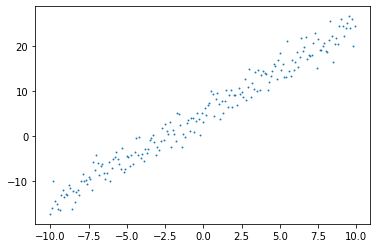

In [ ]:
plt.scatter(x,y, s= .8);

In [ ]:
w = torch.zeros_like(x, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
w,b

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True),
 tensor(0., requires_grad=True))

In [ ]:
w = torch.zeros_like(x, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
lr = 0.1
loss = torch.nn.MSELoss()

for epoch in range(1001):
    # Forward pass
    y_hat = w*x + b
    L = loss(y_hat,y)
    if not epoch%100: print(f"epoch: {epoch} MSE: {L:.4f}")
    
    # Backward pass
    L.backward()
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

        b.grad = None
        w.grad = None


epoch: 0 MSE: 160.9168
epoch: 100 MSE: 3.0072
epoch: 200 MSE: 1.4913
epoch: 300 MSE: 1.0552
epoch: 400 MSE: 0.8411
epoch: 500 MSE: 0.7101
epoch: 600 MSE: 0.6204
epoch: 700 MSE: 0.5545
epoch: 800 MSE: 0.5036
epoch: 900 MSE: 0.4630
epoch: 1000 MSE: 0.4296


In [ ]:
w.is_leaf

True

In [ ]:
def show_ids(*arg):
    for x in arg:
        print(id(x))


w = torch.zeros_like(x, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
lr = 0.1
loss = torch.nn.MSELoss()

for epoch in range(1001):
    # Forward pass
    y_hat = w*x + b
    L = loss(y_hat,y)
    if not epoch%100: print(f"epoch: {epoch} MSE: {L:.4f}")
    
    # w,b require grads
    # show_ids(w,b)
    
    # Backward pass
    L.backward()
    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad
        # w,b are new objects now, which are created with rg = False due to no_grad()
        # w,b are still leaf tensors

        # turn on the rg flag
        w.requires_grad_()
        b.requires_grad_()

    # show_ids(w,b)

epoch: 0 MSE: 160.9168
epoch: 100 MSE: 3.0072
epoch: 200 MSE: 1.4913
epoch: 300 MSE: 1.0552
epoch: 400 MSE: 0.8411
epoch: 500 MSE: 0.7101
epoch: 600 MSE: 0.6204
epoch: 700 MSE: 0.5545
epoch: 800 MSE: 0.5036
epoch: 900 MSE: 0.4630
epoch: 1000 MSE: 0.4296


In [ ]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 3749.250244140625
199 2488.893798828125
299 1653.5198974609375
399 1099.73974609375
499 732.5693969726562
599 489.082275390625
699 327.5841064453125
799 220.44512939453125
899 149.3529510498047
999 102.16880798339844
1099 70.84471130371094
1199 50.04443359375
1299 36.22840118408203
1399 27.048768997192383
1499 20.9477596282959
1599 16.891530990600586
1699 14.19388198852539
1799 12.39908218383789
1899 11.20449161529541
1999 10.409086227416992
Result: y = -0.015072436071932316 + 0.8205098509788513 x + 0.0026002456434071064 x^2 + -0.08817684650421143 x^3


In [ ]:
dt = torch.float
a = torch.tensor((2),dtype=dt, requires_grad=True)
b = torch.tensor((1))

In [ ]:
p = a + b
p.backward()

In [ ]:
def show_is_leaf(*arg):
    for x in arg:
        print(x.is_leaf)

In [ ]:
show_is_leaf(p,a,b)
p,a,b

False
True
True


(tensor(3., grad_fn=<AddBackward0>), tensor(2., requires_grad=True), tensor(1))

In [ ]:
a.grad

tensor(1.)

In [ ]:
a = a + a.grad*5
a, a.requires_grad

(tensor(7., grad_fn=<AddBackward0>), True)

A is no more leaf because it was created by an operation and it has rg = True

In [ ]:
a.requires_grad = False

RuntimeError: ignored

In [ ]:
show_is_leaf(p,a,b)
p,a,b

False
False
True


(tensor(3., grad_fn=<AddBackward0>),
 tensor(7., grad_fn=<AddBackward0>),
 tensor(1))

b has rg = False, so it is leaf tensor by conv.

b.requires_grad


In [ ]:
c = b*5
c.is_leaf

True

In [ ]:
c.requires_grad

False

c was created by an operation, but since it has rg = False, it is also a leaf tensor.

In [ ]:
d = a * 5
d

tensor(35., grad_fn=<MulBackward0>)

In [ ]:
d.is_leaf, d.requires_grad

(False, True)

d is created by an operation and it has rg = True, so it is not leaf tensor.

In [ ]:
with torch.no_grad():
    e = a + d

e.is_leaf, e.requires_grad

(True, False)

e is created by a function, but due to context manager all rg were switched off, so it has rg = False which makes it a leaf tensor.

## Summary of rg and leaf


*   if t has rg == False, it is a leaf tensor
*   if t has rg == True and

    *   if was created by an operation, it is not a leaf tensor
    *   it was created by user, it is a leaf tensor


*   if t is a leaf tensor

    *   with rg == True, it's gradient will be computed whenever we call backward
    *   with rg == False, to compute gradients, we need to set rg = True


*   if t is not a leaf tensor 

    - it always has rg = True
    - to compute their gradients use retain_grad()
    - we cannot set rg = False








# Pipeline

In [ ]:
y = 2*x + 3
y

tensor([-3.2832, -3.2769, -3.2706,  ...,  9.2706,  9.2769,  9.2832])

In [ ]:
def forward(w,x,b):
    return w*x + b

In [ ]:
w = torch.tensor(0.0, requires_grad= True)
b = torch.tensor(0.0, requires_grad = True)
lr = 0.01
mse = torch.nn.MSELoss()
optim = torch.optim.SGD([w,b],lr = lr)

In [ ]:
n_iters = 1000
for epoch in range(n_iters):
    # FP
    y_pred = forward(w,x,b)

    # loss
    loss = mse(y_pred, y)

    # BP
    loss.backward()

    # update
    optim.step()

    # remove
    optim.zero_grad()

    if epoch%100 == 0:
        print(f"epoch: {epoch+1} W: {w.item():.4f} b: {b.item():.4f} mse: {loss:.4f}")

epoch: 1 W: 0.1317 b: 0.0600 mse: 22.1726
epoch: 101 W: 1.9979 b: 2.6101 mse: 0.1583
epoch: 201 W: 2.0000 b: 2.9483 mse: 0.0028
epoch: 301 W: 2.0000 b: 2.9931 mse: 0.0000
epoch: 401 W: 2.0000 b: 2.9991 mse: 0.0000
epoch: 501 W: 2.0000 b: 2.9999 mse: 0.0000
epoch: 601 W: 2.0000 b: 3.0000 mse: 0.0000
epoch: 701 W: 2.0000 b: 3.0000 mse: 0.0000
epoch: 801 W: 2.0000 b: 3.0000 mse: 0.0000
epoch: 901 W: 2.0000 b: 3.0000 mse: 0.0000


In [ ]:
w,b

(tensor(2.0000, requires_grad=True), tensor(3.0000, requires_grad=True))

# LR automated

In [ ]:
X = x.view(-1,2)
Y = 2*X[:,0] + 0.5*X[:,1] + 3
Y = Y.view(X.shape[0],-1)

In [ ]:
n_samples, n_features = X.shape
n_samples, n_features

(1000, 2)

In [ ]:
input_size = n_features
output_size = 1
model = torch.nn.Linear(input_size,output_size)

lr = 0.01
mse = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(),lr = lr)

In [ ]:
n_iters = 1000
for epoch in range(n_iters):
    # FP
    y_pred = model(X)

    # loss
    loss = mse(y_pred, Y)

    # BP
    loss.backward()

    # update
    optim.step()

    # empty
    optim.zero_grad()

    if epoch%(n_iters//10) == 0:
        w,b = model.parameters()
        print(f"epoch: {epoch+1} W: {w.tolist()[0]} b: {b.item():.4f} mse: {loss:.4f}")

epoch: 1 W: [0.33399394154548645, 0.20584553480148315] b: 0.3776 mse: 23.9325
epoch: 101 W: [1.3105014562606812, 1.1894969940185547] b: 2.6503 mse: 0.1257
epoch: 201 W: [1.3100286722183228, 1.1899713277816772] b: 2.9517 mse: 0.0022
epoch: 301 W: [1.30996572971344, 1.19003427028656] b: 2.9917 mse: 0.0000
epoch: 401 W: [1.3099582195281982, 1.1900417804718018] b: 2.9970 mse: 0.0000
epoch: 501 W: [1.3099582195281982, 1.1900417804718018] b: 2.9977 mse: 0.0000
epoch: 601 W: [1.3099582195281982, 1.1900417804718018] b: 2.9978 mse: 0.0000
epoch: 701 W: [1.3099582195281982, 1.1900417804718018] b: 2.9978 mse: 0.0000
epoch: 801 W: [1.3099582195281982, 1.1900417804718018] b: 2.9978 mse: 0.0000
epoch: 901 W: [1.3099582195281982, 1.1900417804718018] b: 2.9978 mse: 0.0000


# Broadcasting

In [ ]:
A = torch.ones(2,2)
B = torch.zeros(1,2)
A,B

(tensor([[1., 1.],
         [1., 1.]]), tensor([[0., 0.]]))

In [ ]:
B += 2

In [ ]:
B

tensor([[2., 2.]])

In [ ]:
A + B

tensor([[3., 3.],
        [3., 3.]])

In [ ]:
A * B

tensor([[2., 2.],
        [2., 2.]])

In [ ]:
A * B + 3

tensor([[5., 5.],
        [5., 5.]])

In [ ]:
B += torch.tensor((2,5))
B

tensor([[4., 7.]])

In [ ]:
A + B

tensor([[5., 8.],
        [5., 8.]])

In [ ]:
A

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
A[1:,:] = torch.tensor((3,5))

In [ ]:
A

tensor([[1., 1.],
        [3., 5.]])

In [ ]:
A + B

tensor([[ 5.,  8.],
        [ 7., 12.]])

In [ ]:
A

tensor([[1., 1.],
        [3., 5.]])

In [ ]:
C = A[:,0] * 2 + A[:,1]*0.5
C

tensor([2.5000, 8.5000])

In [ ]:
D = A * torch.tensor((2,0.5)) 
D.sum(1)

tensor([2.5000, 8.5000])

# Logistic Regression

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Prepare the data
# Load the data
ds = datasets.load_breast_cancer()
X,y = ds.data, ds.target

# Split the dataset
X_train, X_test, y_train, y_true = train_test_split(X,y,test_size = 0.2, random_state = 99)

# Transfrom into standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Make them tensors

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(-1,1)
y_true = torch.from_numpy(y_true.astype(np.float32)).view(-1,1)


In [ ]:
# Design the model

class LogisticRegression(torch.nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = torch.nn.Linear(n_input_features,1)

    def forward(self,x):
        linear_results = self.linear(x)
        return torch.sigmoid(linear_results)

f = X_train.shape[1]
model = LogisticRegression(n_input_features= f)


In [ ]:
# Loss and Optimizer

lr = 0.01
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [ ]:
# Training loop

n_epochs = 100
print_every = n_epochs // 10

for epoch in range(n_epochs):

    # FP
    y_pred = model(X_train)

    # compute loss and gradients for BP
    loss = criterion(y_pred, y_train)
    loss.backward()

    # Apply gradients
    optimizer.step()

    # remove the gradients
    optimizer.zero_grad()

    if epoch % print_every == 9:
        print(f"epoch: {epoch+1} loss: {loss.item():.2f}")

epoch: 10 loss: 0.67
epoch: 20 loss: 0.53
epoch: 30 loss: 0.44
epoch: 40 loss: 0.38
epoch: 50 loss: 0.35
epoch: 60 loss: 0.32
epoch: 70 loss: 0.29
epoch: 80 loss: 0.27
epoch: 90 loss: 0.26
epoch: 100 loss: 0.25


In [ ]:
with torch.no_grad():
    y_pred = model(X_test).round()
    print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")

Test Accuracy: 0.9035


In [ ]:
for x in model.parameters():
    print(x.data)

tensor([[-0.1240, -0.1859, -0.0208, -0.0046, -0.0734,  0.0311, -0.0939, -0.2673,
          0.0228, -0.0266, -0.0261,  0.1275, -0.2879, -0.2661, -0.0339, -0.0292,
          0.0216,  0.0521, -0.0308,  0.0034, -0.2422, -0.1695, -0.0863, -0.2029,
         -0.1837, -0.0608, -0.1564, -0.3139, -0.1078, -0.0592]])
tensor([-0.0170])


In [ ]:
W,b = model.linear.parameters()
W,b

(Parameter containing:
 tensor([[-0.1240, -0.1859, -0.0208, -0.0046, -0.0734,  0.0311, -0.0939, -0.2673,
           0.0228, -0.0266, -0.0261,  0.1275, -0.2879, -0.2661, -0.0339, -0.0292,
           0.0216,  0.0521, -0.0308,  0.0034, -0.2422, -0.1695, -0.0863, -0.2029,
          -0.1837, -0.0608, -0.1564, -0.3139, -0.1078, -0.0592]],
        requires_grad=True), Parameter containing:
 tensor([-0.0170], requires_grad=True))

In [ ]:
type(W)

torch.nn.parameter.Parameter

In [ ]:
W.data

tensor([[-0.1240, -0.1859, -0.0208, -0.0046, -0.0734,  0.0311, -0.0939, -0.2673,
          0.0228, -0.0266, -0.0261,  0.1275, -0.2879, -0.2661, -0.0339, -0.0292,
          0.0216,  0.0521, -0.0308,  0.0034, -0.2422, -0.1695, -0.0863, -0.2029,
         -0.1837, -0.0608, -0.1564, -0.3139, -0.1078, -0.0592]])

In [ ]:
b.data

tensor([-0.0170])

# Dataset and Dataloader

In [2]:
import torch
import numpy as np
import torchvision
from torch.utils.data import DataLoader, Dataset

In [19]:
! wget 'https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv' wine.csv

--2021-04-13 16:27:25--  https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10889 (11K) [text/plain]
Saving to: ‘wine.csv’

wine.csv            100%[===================>]  10.63K  --.-KB/s    in 0s      

2021-04-13 16:27:25 (30.4 MB/s) - ‘wine.csv’ saved [10889/10889]

--2021-04-13 16:27:25--  http://wine.csv/
Resolving wine.csv (wine.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘wine.csv’
FINISHED --2021-04-13 16:27:25--
Total wall clock time: 0.1s
Downloaded: 1 files, 11K in 0s (30.4 MB/s)


In [20]:
! ls

github.com  raw.githubusercontent.com  sample_data  wine.csv


In [37]:
class WineDataset(Dataset):
    def __init__(self, transform = None):
        ds = np.loadtxt('wine.csv', delimiter= ',', skiprows=1, dtype= np.float)
        self.transform = transform
        self.X = ds[:,1:]
        self.y = ds[:,[0]]
    

    def __len__(self):
        return self.X.shape[0]

    
    def __getitem__(self,index):
        sample = self.X[index], self.y[index]
        return self.transform(sample)


dataset = WineDataset()


In [25]:
dataset[0]

(array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03]), array([1.]))

In [26]:
dataloader = DataLoader(dataset= dataset, batch_size= 2, shuffle=True, num_workers = 2)
looper = iter(dataloader)

looper.next()

[tensor([[1.2930e+01, 3.8000e+00, 2.6500e+00, 1.8600e+01, 1.0200e+02, 2.4100e+00,
          2.4100e+00, 2.5000e-01, 1.9800e+00, 4.5000e+00, 1.0300e+00, 3.5200e+00,
          7.7000e+02],
         [1.2850e+01, 1.6000e+00, 2.5200e+00, 1.7800e+01, 9.5000e+01, 2.4800e+00,
          2.3700e+00, 2.6000e-01, 1.4600e+00, 3.9300e+00, 1.0900e+00, 3.6300e+00,
          1.0150e+03]], dtype=torch.float64), tensor([[1.],
         [1.]], dtype=torch.float64)]

In [33]:
for i, (X,y) in enumerate(dataloader):
    print(X,y)
    if torch. == 5: break

tensor([[1.2720e+01, 1.8100e+00, 2.2000e+00, 1.8800e+01, 8.6000e+01, 2.2000e+00,
         2.5300e+00, 2.6000e-01, 1.7700e+00, 3.9000e+00, 1.1600e+00, 3.1400e+00,
         7.1400e+02],
        [1.1760e+01, 2.6800e+00, 2.9200e+00, 2.0000e+01, 1.0300e+02, 1.7500e+00,
         2.0300e+00, 6.0000e-01, 1.0500e+00, 3.8000e+00, 1.2300e+00, 2.5000e+00,
         6.0700e+02]], dtype=torch.float64) tensor([[2.],
        [2.]], dtype=torch.float64)
tensor([[1.3340e+01, 9.4000e-01, 2.3600e+00, 1.7000e+01, 1.1000e+02, 2.5300e+00,
         1.3000e+00, 5.5000e-01, 4.2000e-01, 3.1700e+00, 1.0200e+00, 1.9300e+00,
         7.5000e+02],
        [1.4100e+01, 2.0200e+00, 2.4000e+00, 1.8800e+01, 1.0300e+02, 2.7500e+00,
         2.9200e+00, 3.2000e-01, 2.3800e+00, 6.2000e+00, 1.0700e+00, 2.7500e+00,
         1.0600e+03]], dtype=torch.float64) tensor([[2.],
        [1.]], dtype=torch.float64)
tensor([[1.3070e+01, 1.5000e+00, 2.1000e+00, 1.5500e+01, 9.8000e+01, 2.4000e+00,
         2.6400e+00, 2.8000e-01, 1.3700

In [34]:
class ToTensor:
    def __call__(self, sample):
        x,y = sample
        return torch.from_numpy(x), torch.from_numpy(y)

In [38]:
totensor = ToTensor()
dsWithTransform = WineDataset(transform=totensor)
dataloader = DataLoader(dataset= dsWithTransform, batch_size= 2, shuffle=True, num_workers = 2)
looper = iter(dataloader)

looper.next()

[tensor([[1.3320e+01, 3.2400e+00, 2.3800e+00, 2.1500e+01, 9.2000e+01, 1.9300e+00,
          7.6000e-01, 4.5000e-01, 1.2500e+00, 8.4200e+00, 5.5000e-01, 1.6200e+00,
          6.5000e+02],
         [1.4370e+01, 1.9500e+00, 2.5000e+00, 1.6800e+01, 1.1300e+02, 3.8500e+00,
          3.4900e+00, 2.4000e-01, 2.1800e+00, 7.8000e+00, 8.6000e-01, 3.4500e+00,
          1.4800e+03]], dtype=torch.float64), tensor([[3.],
         [1.]], dtype=torch.float64)]

# Feed Forward Network

In [2]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

In [58]:
# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the dataset

train = torchvision.datasets.MNIST('./data', train = True, 
                                   transform = torchvision.transforms.ToTensor(),
                                   download = True
                                   )
test = torchvision.datasets.MNIST('./data', train = False,
                                   transform = torchvision.transforms.ToTensor(),
                                   )

In [59]:
train.data.shape

torch.Size([60000, 28, 28])

In [60]:
input_size = train.data.shape[0]
n_clasess = train.targets.unique().shape[0]
input_features = 28*28

# Hyper parameters
hidden_size = 100
batch_size = 50
learning_rate = 0.01
n_epochs = 2

In [61]:
train_dataloader = torch.utils.data.DataLoader(dataset = train, batch_size= batch_size, shuffle = True, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(dataset = test, batch_size= batch_size, num_workers=2)

In [62]:
looper = iter(train_dataloader)
x,y = looper.next()
x.shape, y.shape

(torch.Size([50, 1, 28, 28]), torch.Size([50]))

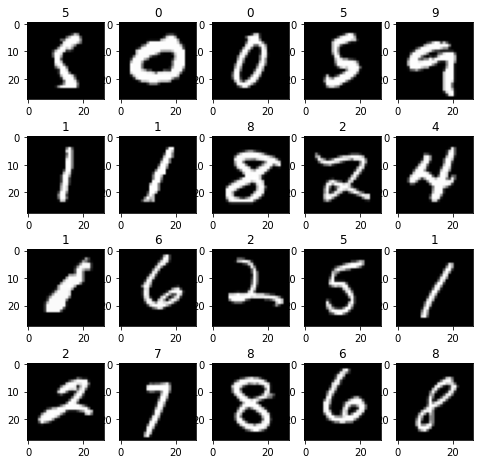

In [63]:
plt.figure(figsize = (8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x[i][0], cmap = 'gray')
    plt.title(y[i].item())

In [73]:
# Model
class NeuralNet(nn.Module):
    def __init__(self, n_inFeatures, hidden_size, n_classes):
        super().__init__()
        self.lin1 = nn.Linear(n_inFeatures, hidden_size)
        self.lin2 = nn.Linear(hidden_size,n_clasess)
    

    def forward(self, x):
        out = self.lin1(x)
        out = torch.relu(out)
        out = self.lin2(out)
        return out
    

model = NeuralNet(input_features, hidden_size, n_clasess).to(device)

In [74]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), learning_rate)

# Training loop
print_every = 100
for epoch in range(n_epochs):
    for i, (data, labels) in enumerate(train_dataloader):
        # Forward
        
        # Flatten the input and cast to device
        # from 100 x 1 x 28 x 28 to 100 x 784
        data = data.view(-1,input_features).to(device)
        labels = labels.to(device)
        preds = model(data)
        loss = criterion(preds, labels)

        # Backward
        loss.backward()
        optim.step()
        # Remove gradients
        optim.zero_grad()

        # Progress
        if i%print_every == 0:
            print(f"epoch: {epoch+1} step: {i}/{len(train_dataloader)} loss: {loss.item():.4f}")

epoch: 1 step: 0/1200 loss: 2.2861
epoch: 1 step: 100/1200 loss: 0.2786
epoch: 1 step: 200/1200 loss: 0.1091
epoch: 1 step: 300/1200 loss: 0.3305
epoch: 1 step: 400/1200 loss: 0.1848
epoch: 1 step: 500/1200 loss: 0.1764
epoch: 1 step: 600/1200 loss: 0.2409
epoch: 1 step: 700/1200 loss: 0.0389
epoch: 1 step: 800/1200 loss: 0.0564
epoch: 1 step: 900/1200 loss: 0.1042
epoch: 1 step: 1000/1200 loss: 0.2794
epoch: 1 step: 1100/1200 loss: 0.3557
epoch: 2 step: 0/1200 loss: 0.1060
epoch: 2 step: 100/1200 loss: 0.0967
epoch: 2 step: 200/1200 loss: 0.2436
epoch: 2 step: 300/1200 loss: 0.0441
epoch: 2 step: 400/1200 loss: 0.0778
epoch: 2 step: 500/1200 loss: 0.1291
epoch: 2 step: 600/1200 loss: 0.2579
epoch: 2 step: 700/1200 loss: 0.0706
epoch: 2 step: 800/1200 loss: 0.3505
epoch: 2 step: 900/1200 loss: 0.2993
epoch: 2 step: 1000/1200 loss: 0.2008
epoch: 2 step: 1100/1200 loss: 0.0371


In [84]:
with torch.no_grad():
    tot = 0
    correct = 0
    for i, (data, labels) in enumerate(test_dataloader):
        # get output probabilities
        data = data.to(device)
        labels = labels.to(device)
        outputs = model(data.view(-1,input_features))
        values, idx = torch.max(outputs, axis = 1)
        correct += (idx == labels).sum().item()
        tot += labels.shape[0]

print('test_accuracy: ', correct/tot)


accuracy:  0.96
